In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

In [2]:
import os;
os.chdir("/Users/cesare.chung/Dropbox/2017ML/CHPT-NTHU/Working_Directory_/Rcode/AU2/ENIG/")

print (os.getcwd());

/Users/cesare.chung/Dropbox/2017ML/CHPT-NTHU/Working_Directory_/Rcode/AU2/ENIG


In [3]:
#
mesapp = pd.read_csv("mesapp.csv")
#

In [4]:
#############################################################
#TIME
mesapp['TIME1213'] = mesapp[['PRESENT_DIPPING_12','PRESENT_DIPPING_13']].sum(axis=1)
mesapp['TIME2122'] = mesapp[['PRESENT_DIPPING_21','PRESENT_DIPPING_22']].sum(axis=1)
mesapp['TIME2627'] = mesapp[['PRESENT_DIPPING_26','PRESENT_DIPPING_27']].sum(axis=1)
mesapp['TIME3132'] = mesapp[['PRESENT_DIPPING_31','PRESENT_DIPPING_32']].sum(axis=1)   
#TEMPERATURE
mesapp['TEMPERATURE1213'] = mesapp[['TEMPERATURE_12','TEMPERATURE_13']].sum(axis=1)
mesapp['TEMPERATURE2122'] = mesapp[['TEMPERATURE_21','TEMPERATURE_22']].sum(axis=1)
mesapp['TEMPERATURE2627'] = mesapp[['TEMPERATURE_26','TEMPERATURE_27']].sum(axis=1)
mesapp['TEMPERATURE3132'] = mesapp[['TEMPERATURE_31','TEMPERATURE_32']].sum(axis=1)

mesapp['HEATING2122'] = mesapp[['HEATING_21','HEATING_22']].sum(axis=1)
mesapp['HEATING3132'] = mesapp[['HEATING_31','HEATING_32']].sum(axis=1)
#Neglect data TIME3132 < 600
mesapp=mesapp[mesapp['TIME3132']>600]
#mesapp=mesapp[mesapp['TIME3132']>100]
#

In [5]:
#
def order(frame,var):
    varlist =[w for w in frame.columns if w not in var]
    frame = frame[var+varlist]
    return frame 
#

In [6]:
var = ['DD1','DD2','DD3','DD4','DD5','DD6','DD7','DD8','DD9','DD10','DD11','DD12']
varD = ['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12']

In [7]:
#
for i, j in zip(var,varD):
    mesapp[i] = 0
    mesapp[i][mesapp[j] > 0] = 1
#

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [8]:
mesapp = order(mesapp,['DD1','DD2','DD3','DD4','DD5','DD6','DD7','DD8','DD9','DD10','DD11','DD12'])
mesapp = order(mesapp,['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12'])
#
mesapp[['D2','DD2','D3','DD3']].head()

,D2,DD2,D3,DD3
0,NaN,0,NaN,0
1,NaN,0,NaN,0
2,NaN,0,1.0,1
3,NaN,0,NaN,0
4,NaN,0,1.0,1


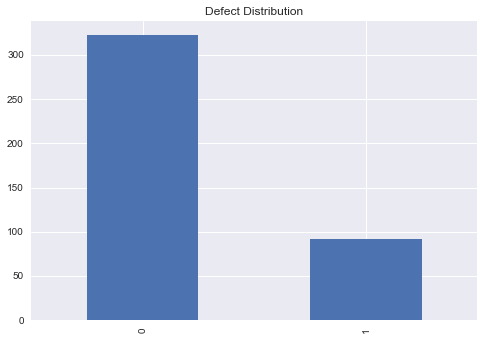

In [9]:
import pylab as P
#
series = mesapp['DD2'].value_counts()
series
series.head(3)
series.plot(kind='bar', title='Defect Distribution')

P.show()

In [10]:
#
varDD = ['DD2','DD3','DD5','DD6','DD8','DD9']

for i in varDD:
   DDCount =mesapp[i].value_counts()
   print (DDCount)

0    322
1     92
Name: DD2, dtype: int64
0    293
1    121
Name: DD3, dtype: int64
0    374
1     40
Name: DD5, dtype: int64
0    388
1     26
Name: DD6, dtype: int64
0    400
1     14
Name: DD8, dtype: int64
0    402
1     12
Name: DD9, dtype: int64


In [11]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.cross_validation import cross_val_predict
from sklearn.cross_validation import cross_val_score
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split

def classification_model(model, data, predictors, outcome):
  X_train,X_test,Y_train,Y_test = train_test_split(data[predictors],data[outcome],test_size=0.2)
  #fit the model
  model.fit(X_train,Y_train)
  #make predictions on testing set
  predictions = model.predict(X_test)
#  print predictions
  #generate evaluation metrics
  accuracy = metrics.accuracy_score(predictions, Y_test)
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
  #perform k-fold cross-validation with 10 folds
  kf = KFold(data.shape[0], n_folds=10, shuffle=True)
  error = []
  for train, test in kf:
    #filter training data
    train_predictors = (data[predictors].iloc[train,:]) 
    #the target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    #fit the model
    model.fit(train_predictors, train_target)
    #make predictions on testing set
    pred = model.predict(data[predictors].iloc[test,:])
    #record error from each cross-validation run
#    error.append(metrics.accuracy_score( pred, data[outcome].iloc[test]))
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))

    #evaluate the model using 10-fold cross-validation
    scores_accuracy = cross_val_score(model,data[predictors],data[outcome],scoring='accuracy',cv=kf)
  print (scores_accuracy)
  print (scores_accuracy.mean())

  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 


/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
#
outcome_var = 'DD2'
#
df=mesapp.drop(mesapp.loc[:, "D1":"DD12"], axis=1)
#
predictor_var = list(df.columns.values)
#
#model = LogisticRegression()
model = RandomForestClassifier(n_estimators=80)
#
classification_model(model, mesapp,predictor_var,outcome_var)

Accuracy : 80.723%
[ 0.73809524  0.85714286  0.76190476  0.85714286  0.82926829  0.75609756
  0.75609756  0.73170732  0.80487805  0.73170732]
0.782404181185
Cross-Validation Score : 78.240%


In [13]:
#create a series with feature importances
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)
#

PRESENT_DIPPING_32    0.029645
TEMPERATURE_32        0.027993
CONDUCTIVITY_35       0.027300
PRESENT_DIPPING_31    0.025514
ERP_EFrontareaSQ      0.024183
CONDUCTIVITY_25       0.022770
CONDUCTIVITY_23       0.022687
CONDUCTIVITY_30       0.022682
TEMPERATURE_18        0.022533
TEMPERATURE_31        0.021831
ERP_EBackareaSQ       0.020823
AREA                  0.020562
HEATING_31            0.020393
CONDUCTIVITY_20       0.020312
PRESENT_DIPPING_34    0.018316
TEMPERATURE_12        0.017844
TIME3132              0.016502
PRESENT_DIPPING_22    0.016324
PRESENT_DIPPING_33    0.016086
PRESENT_DIPPING_15    0.015873
TIME2122              0.015831
TEMPERATURE_01        0.015746
TEMPERATURE_02        0.015567
TEMPERATURE_27        0.015504
TEMPERATURE1213       0.014994
ERP_QTY               0.014919
HEATING_32            0.014736
TEMPERATURE3132       0.013490
AUTHICK_01            0.013488
NITHICK_02            0.013209
                        ...   
PRESENT_DIPPING_21    0.006408
PRESENT_

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


Feature ranking:
1. feature 37 (0.029645)
2. feature 54 (0.027993)
3. feature 63 (0.027300)
4. feature 36 (0.025514)
5. feature 67 (0.024183)
6. feature 61 (0.022770)
7. feature 60 (0.022687)
8. feature 62 (0.022682)
9. feature 48 (0.022533)
10. feature 53 (0.021831)
11. feature 68 (0.020823)
12. feature 2 (0.020562)
13. feature 57 (0.020393)
14. feature 59 (0.020312)
15. feature 39 (0.018316)
16. feature 45 (0.017844)
17. feature 86 (0.016502)
18. feature 27 (0.016324)
19. feature 38 (0.016086)
20. feature 20 (0.015873)
21. feature 84 (0.015831)
22. feature 42 (0.015746)
23. feature 43 (0.015567)
24. feature 52 (0.015504)
25. feature 87 (0.014994)
26. feature 64 (0.014919)
27. feature 58 (0.014736)
28. feature 90 (0.013490)
29. feature 69 (0.013488)
30. feature 77 (0.013209)
31. feature 76 (0.013152)
32. feature 56 (0.013119)
33. feature 40 (0.013110)
34. feature 23 (0.013068)
35. feature 14 (0.012993)
36. feature 5 (0.012607)
37. feature 89 (0.012080)
38. feature 91 (0.011675)
39. fe

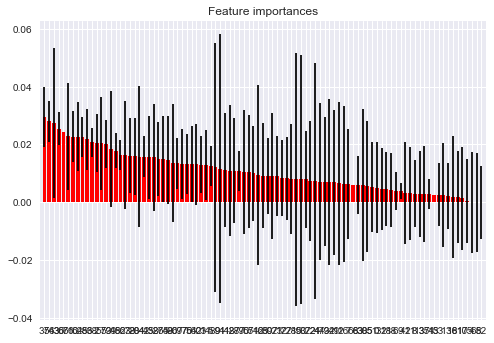

In [14]:
importances = model.feature_importances_

importance = pd.DataFrame(model.feature_importances_, index=predictor_var, 
                          columns=["Importance"])

importance["Std"] = np.std([tree.feature_importances_
                            for tree in model.estimators_], axis=0)

indices = np.argsort(importances)[::-1]

x = range(importance.shape[0])
#y = importance.ix[:, 0]
y = importances[indices]
yerr = importance.ix[:, 1]

# print the feature ranking
print("Feature ranking:")

for f in range(importance.shape[0]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
#
plt.figure()
plt.title("Feature importances")
plt.bar(x, y, yerr=yerr,  color="r",align="center")

plt.xticks(range(importance.shape[0]), indices)
plt.xlim([-1, importance.shape[0]] )
#P.savefig('foo.png', bbox_inches='tight')
plt.show()
#

PRESENT_DIPPING_32    0.029645
TEMPERATURE_32        0.027993
CONDUCTIVITY_35       0.027300
PRESENT_DIPPING_31    0.025514
ERP_EFrontareaSQ      0.024183
CONDUCTIVITY_25       0.022770
CONDUCTIVITY_23       0.022687
CONDUCTIVITY_30       0.022682
TEMPERATURE_18        0.022533
TEMPERATURE_31        0.021831
ERP_EBackareaSQ       0.020823
AREA                  0.020562
HEATING_31            0.020393
CONDUCTIVITY_20       0.020312
PRESENT_DIPPING_34    0.018316
TEMPERATURE_12        0.017844
TIME3132              0.016502
PRESENT_DIPPING_22    0.016324
PRESENT_DIPPING_33    0.016086
PRESENT_DIPPING_15    0.015873
TIME2122              0.015831
TEMPERATURE_01        0.015746
TEMPERATURE_02        0.015567
TEMPERATURE_27        0.015504
TEMPERATURE1213       0.014994
ERP_QTY               0.014919
HEATING_32            0.014736
TEMPERATURE3132       0.013490
AUTHICK_01            0.013488
NITHICK_02            0.013209
                        ...   
PRESENT_DIPPING_21    0.006408
PRESENT_

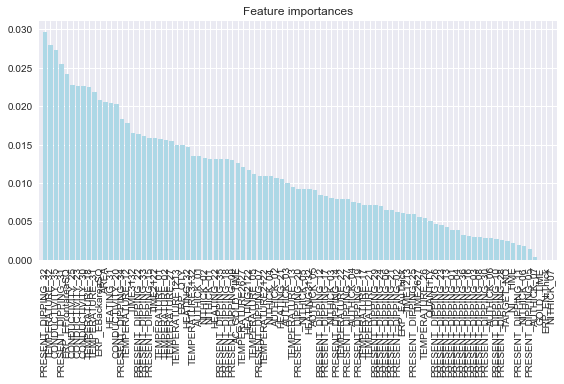

In [15]:
############################################################# ploting (randomforest + feature importance)
importances = model.feature_importances_

importance = pd.DataFrame(model.feature_importances_, index=predictor_var, columns=["Importance"])

indices = np.argsort(importances)[::-1]
#
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)
#
feat_labels = featimp.index[0:]

for f in range(importance.shape[0]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[f], importances[indices[f]]))

plt.title("Feature importances")
plt.bar(range(importance.shape[0]),importances[indices],color='lightblue',align='center')
plt.xticks(range(importance.shape[0]), feat_labels, rotation=90)
plt.xlim([-1, importance.shape[0]])
plt.tight_layout()
plt.show()
############################################################# 